In [1]:
%matplotlib inline

import numpy as np
import scipy.stats as st
import seaborn as sns


def circle(x, y):
  return x**2 + y**2 - 4**2

def gauss_2d(x, y):
  mus = np.array([2, 2])
  sigmas = np.array([[1, .5], [.5, 1]])
  return st.multivariate_normal.pdf([x, y], mean=mus, cov=sigmas)

def metropolis_hastings(f, iter):
  x, y = 0., 0.
  samples = np.zeros((iter, 2))
  for i in range(iter):
    x_cand, y_cand  = np.array([x, y]) + np.random.normal(size=2)
    ratio = f(x_cand, y_cand) / f(x, y)
    if ratio > 1 or np.random.rand() < ratio:
      x, y = x_cand, y_cand
    samples[i] = np.array([x, y])

  return samples

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


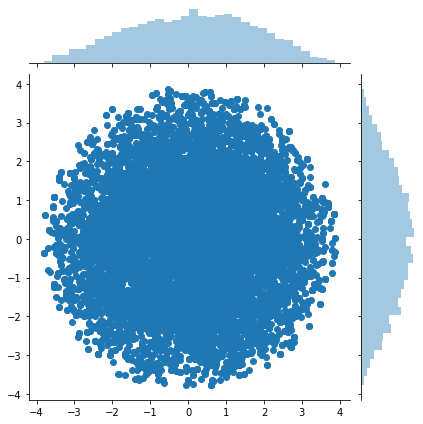

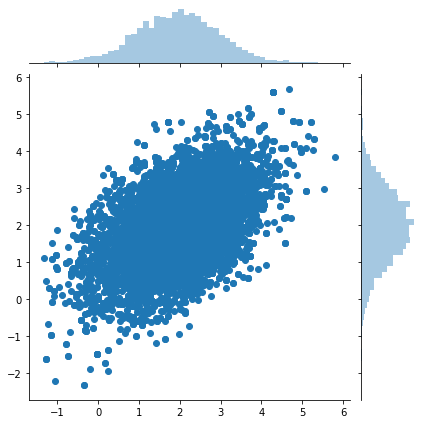

In [2]:
circ = metropolis_hastings(circle, iter=10000)
sns.jointplot(circ[:, 0], circ[:, 1])

gauss = metropolis_hastings(gauss_2d, iter=10000)
sns.jointplot(gauss[:, 0], gauss[:, 1])

In [0]:
import matplotlib.pyplot as plt


def check_neighbours(field, i, j):
  s, _ = field.shape
  return not (field[(i-1) % s, j] or \
   field[i, (j-1) % s] or \
    field[(i+1) % s, j] or \
     field[i, (j+1) % s]) 

def init_field(iter=100000, size=100):
  field = np.zeros([size, size], dtype=int)

  for i in range(iter):
    i, j = np.random.randint(size, size=2)
    if check_neighbours(field, i, j):
      field[i, j] = abs(field[i,j] - 1)
  return field

def draw(field):
  plt.imshow(field, cmap='Greys',  interpolation='nearest')
  fig = plt.gcf()
  fig.set_size_inches(18.5, 10.5)
  plt.show()

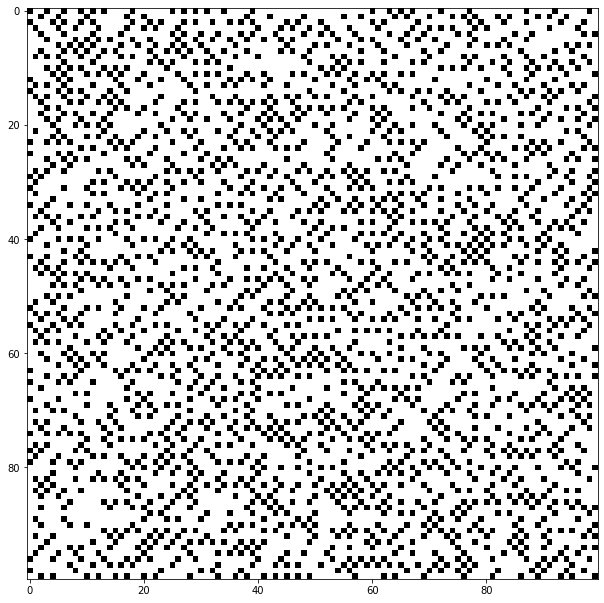

In [4]:
size = 100
field = init_field(size=size)
draw(field)

In [5]:
'''
shape:
. 0
0 s
'''
from math import log2

occurs = [0, 0]

def check_zero_rad(field, i, j):
  s, _ = field.shape
  return not (field[i, (j-1) % s] or field[(i-1) % s, j])

for i in range(size):
  for j in range(size):
    if check_zero_rad(field, i, j):
      occurs[field[i, j]] += 1
q = (occurs[1]) / (occurs[0] + occurs[1])

h_q = - (q * log2(q) + (1-q) * log2(1-q))

pi_0 = (occurs[0] + occurs[1]) / (size ** 2)

ntropy = h_q * pi_0

q, pi_0, h_q, ntropy

(0.3589865399841647, 0.6315, 0.9418387244125347, 0.5947711544665156)

In [7]:
'''
shape:
. . 0 b
. 0 s .
a . . .
'''

from collections import defaultdict

def check_one_rad(field, i, j, a, b, current):
  s, _ = field.shape
  return field[i, j] == current \
   and field[(i+1) % s, (j-2) % s] == a \
    and field[(i-1) % s, ((j+1)%s)] == b \
     and check_zero_rad(field, i, j)

curr_zero = (0, 0, 0), (0, 0, 1), (1, 0, 0), (1, 0, 1)
curr_one = (0, 1, 0), (1, 1, 0), (0, 1, 1), (1, 1, 1)
patterns = curr_zero + curr_one


occurs = defaultdict(int)
for i in range(size):
  for j in range(size):
    for pattern in patterns:
      a, current, b = pattern
      if check_one_rad(field, i, j, a, b, current):
        occurs[pattern] += 1
q = []
h_q = 0
ntropy = 0
for pattern in curr_one:
  a, _, b = pattern
  zero_pattern = a, 0, b
  total = occurs[pattern] + occurs[zero_pattern]
  prob = occurs[pattern] / total
  q.append(prob)
  h_pattern = prob * log2(prob) + (1-prob) * log2(1-prob)
  h_q += h_pattern
  pi_0 = total / size ** 2
  ntropy += h_pattern * pi_0
  
q = np.reshape(q, (2, 2))
h_q *= -1
ntropy *= -1

print(occurs)
print(q)
# print(h_q)
# print(ntropy)

defaultdict(<class 'int'>, {(0, 1, 0): 1185, (0, 1, 1): 725, (0, 0, 0): 2424, (0, 0, 1): 846, (1, 0, 1): 215, (1, 0, 0): 563, (1, 1, 0): 233, (1, 1, 1): 124})
[[0.3283458  0.29271357]
 [0.4614895  0.36578171]]
